# Aim : try to find out the most successful team, players and factors contributing to win or loss of a team

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dvr=pd.read_csv('deliveries.csv')
mat=pd.read_csv('matches.csv')
mat.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [4]:
dvr.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

## team performance..

In [5]:
team=pd.DataFrame(mat.groupby('winner')['id'].count().sort_values(ascending=False).head(10)).reset_index()
team.

,winner,id
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


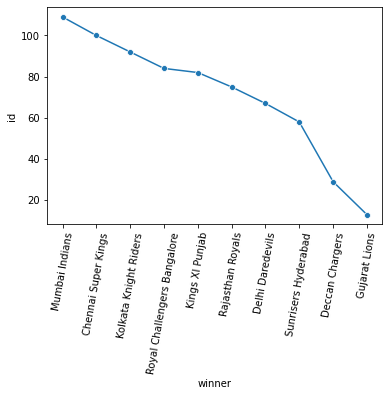

In [6]:
sns.lineplot(x=team['winner'],y=team['id'],marker='o')
plt.xticks(rotation=80)
plt.show()

## player performance....

In [7]:
player=pd.DataFrame(mat.groupby('player_of_match')['id'].count().sort_values(ascending=False).head(10)).reset_index()
player

,player_of_match,id
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


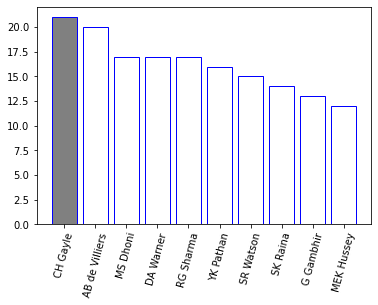

In [8]:
plt.bar(x=player['player_of_match'],height=player['id'],color=['grey','white','white','white','white','white','white','white','white','white'],edgecolor='blue')
plt.xticks(rotation=75)
plt.show()

## factor contribution..

In [10]:
pd.DataFrame(mat.groupby(['winner','city'])['id'].count().sort_values(ascending=False))

id
winner                city            
Mumbai Indians        Mumbai        53
Kolkata Knight Riders Kolkata       45
Chennai Super Kings   Chennai       40
Rajasthan Royals      Jaipur        32
Sunrisers Hyderabad   Hyderabad     30
...                                 ..
Delhi Daredevils      Ahmedabad      1
                      Bloemfontein   1
                      Cape Town      1
Kolkata Knight Riders Centurion      1
Chennai Super Kings   Abu Dhabi      1

[211 rows x 1 columns]

In [11]:
mat_1=mat.where(mat.toss_winner==mat.winner).dropna()
pd.DataFrame(mat_1.groupby('winner').count()['id']).reset_index()

,winner,id
0,Chennai Super Kings,15
1,Delhi Capitals,6
2,Delhi Daredevils,2
3,Kings XI Punjab,7
4,Kolkata Knight Riders,9
5,Mumbai Indians,8
6,Rajasthan Royals,8
7,Royal Challengers Bangalore,6
8,Sunrisers Hyderabad,6


In [12]:
pd.DataFrame(mat.groupby('winner').count()['city']).reset_index().merge(pd.DataFrame(mat_1.groupby('winner').count()['id']).reset_index())

,winner,city,id
0,Chennai Super Kings,98,15
1,Delhi Capitals,10,6
2,Delhi Daredevils,66,2
3,Kings XI Punjab,81,7
4,Kolkata Knight Riders,92,9
5,Mumbai Indians,109,8
6,Rajasthan Royals,75,8
7,Royal Challengers Bangalore,83,6
8,Sunrisers Hyderabad,56,6


In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
dvr.head(100)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


## bowler and batsman summary...

In [14]:
dvr.groupby('batsman').sum()['batsman_runs'].sort_values(ascending=False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

In [15]:
bowler_over=pd.DataFrame(dvr.groupby('bowler').count()['ball']//6).reset_index().rename(columns={'ball':'over'})
bowler_over

,bowler,over
0,A Ashish Reddy,45
1,A Chandila,39
2,A Choudhary,18
3,A Dananjaya,4
4,A Flintoff,11
...,...,...
400,YA Abdulla,37
401,YK Pathan,197
402,YS Chahal,306
403,Yuvraj Singh,147


In [16]:
bowler_runs=pd.DataFrame(dvr.groupby('bowler').sum()['total_runs'].sort_values(ascending=False)).reset_index()
bowler_runs

,bowler,total_runs
0,PP Chawla,4153
1,Harbhajan Singh,4050
2,A Mishra,3850
3,DJ Bravo,3733
4,UT Yadav,3640
...,...,...
400,LA Carseldine,6
401,SS Mundhe,6
402,AM Rahane,5
403,SPD Smith,5


In [17]:
bowler_summary=bowler_over.merge(bowler_runs)
bowler_summary

,bowler,over,total_runs
0,A Ashish Reddy,45,400
1,A Chandila,39,245
2,A Choudhary,18,144
3,A Dananjaya,4,48
4,A Flintoff,11,106
...,...,...,...
400,YA Abdulla,37,311
401,YK Pathan,197,1443
402,YS Chahal,306,2416
403,Yuvraj Singh,147,1092


In [18]:
bowler_summary['per_over_runs']=bowler_summary['total_runs']/bowler_summary['over']
bowler_summary=bowler_summary[bowler_summary['over']!=0].reset_index(drop=True)
bowler_summary[bowler_summary['over']>100].sort_values('per_over_runs').head(10)

,bowler,over,total_runs,per_over_runs
6,A Kumble,163,1089,6.680982
107,DW Steyn,367,2454,6.686649
206,M Muralitharan,263,1765,6.711027
268,R Ashwin,502,3391,6.754980
345,SP Narine,433,2939,6.787529
300,Rashid Khan,184,1257,6.831522
100,DL Vettori,130,894,6.876923
137,J Botha,118,818,6.932203
125,Harbhajan Singh,575,4050,7.043478
339,SL Malinga,495,3511,7.092929


In [19]:
bowler_summary.sort_values('per_over_runs',ascending=False).head(10)

,bowler,over,total_runs,per_over_runs
77,CK Kapugedera,2,49,24.500000
128,I Malhotra,1,23,23.000000
196,LPC Silva,1,21,21.000000
50,B Chipli,1,20,20.000000
253,P Prasanth,1,18,18.000000
292,RR Bhatkal,2,35,17.500000
321,S Sriram,3,49,16.333333
108,F du Plessis,1,16,16.000000
313,S Midhun,2,32,16.000000
363,Sunny Gupta,3,47,15.666667


In [20]:
bowler_summary[bowler_summary['over']>50].sort_values('per_over_runs',ascending=False).head(10)

,bowler,over,total_runs,per_over_runs
74,CJ Anderson,52,532,10.230769
66,Basil Thampi,68,666,9.794118
249,P Krishna,72,685,9.513889
227,MP Stoinis,63,588,9.333333
236,Mohammed Siraj,97,900,9.278351
266,Pankaj Singh,51,472,9.254902
158,JR Hopes,61,562,9.213115
8,A Mithun,52,477,9.173077
95,DJ Hussey,53,485,9.150943
59,BB Sran,86,786,9.139535


## extra runs summary...

In [36]:
dvr_1=dvr[dvr['extra_runs']!=0]

In [37]:
bowler_extra_count=dvr_1.groupby('bowler').count()['extra_runs']
bowler_extra_count=pd.DataFrame(bowler_extra_count).reset_index().rename(columns={'extra_runs':'count_of_extra'})
bowler_extra_count

,bowler,count_of_extra
0,A Ashish Reddy,12
1,A Chandila,2
2,A Choudhary,7
3,A Dananjaya,1
4,A Flintoff,1
...,...,...
352,YA Abdulla,17
353,YK Pathan,63
354,YS Chahal,82
355,Yuvraj Singh,24


In [40]:
bowler_extra_sum=dvr_1.groupby('bowler').sum()['total_runs']
bowler_extra_sum=pd.DataFrame(bowler_extra_sum).reset_index()

In [49]:
extra_summary=bowler_extra_count.merge(bowler_extra_sum)
print('poor bowler performance')
extra_summary.sort_values('total_runs',ascending=False).head(10)
## bowler performance is poor

poor bowler performance


,bowler,count_of_extra,total_runs
302,SL Malinga,221,336
335,UT Yadav,180,285
83,DJ Bravo,176,262
114,I Sharma,151,246
49,B Kumar,162,237
228,P Kumar,185,236
262,RP Singh,145,199
244,R Ashwin,133,192
310,SR Watson,155,189
97,DW Steyn,139,189


# THANK YOU.......